In [ ]:
# %pip install cookiecutter
# %cookiecutter https://github.com/drivendata/cookiecutter-data-science

In [155]:
%cd /Users/sijeshp/MSc/SijDev/MLOps_ChurnPred

/Users/sijeshp/MSc/SijDev/MLOps_ChurnPred


In [74]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  #or 'svg'.

In [75]:
from src.features import helper_features
import pandas as pd

In [76]:
data_path = "/Users/sijeshp/MSc/SijDev/MLOps_ChurnPred/data/raw/"
dataset = pd.read_csv(data_path+"WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [77]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data Understanding

In [78]:
report_path+"data_profile_report_01.html"

'/Users/sijeshp/MSc/SijDev/MLOps_ChurnPred/reportsdata_profile_report_01.html'

In [82]:
report_path+"/data_profile_report_01.html"

'/Users/sijeshp/MSc/SijDev/MLOps_ChurnPred/reports/data_profile_report_01.html'

In [83]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dataset, title = " Pandas Profile Report" , explorative= True)
report_path = "/Users/sijeshp/MSc/SijDev/MLOps_ChurnPred/reports/"
profile.to_file(report_path+"data_profile_report_01.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 234.57it/s]


In [8]:
helper_features.dataset_info(dataset, "customers")

Dataset Name: customers | Number of Samples: 7043 | Number of Columns: 21
Column             Data Type
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
No Missing Data on this Dataset!
Memory Usage: 1.183 MB


In [16]:
a,b = helper_features.data_sampling(dataset, 0.05, 2)

In [19]:
helper_features.pie_plot(dataset["Churn"].value_counts(), plot_title="<b> Churn Distribution<b>")

In [26]:
df_aux = dataset.query('Churn == "Yes"')


In [30]:
df_aux = dataset.query('(Contract == "Month-to-month") and (Churn == "No")')
df_aux

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No


In [27]:
df_aux = df_aux['Contract'].value_counts()
helper_features.bar_plot(df_aux, "<b>Contract Types of Churned Clients</b>", "<i>Contract</i>", "<i>Count</i>")

In [28]:
df_aux = dataset.query('(Contract == "Month-to-month") and (Churn == "No")')
helper_features.histogram_subplot(df_aux, df_aux, "MonthlyCharges", "TotalCharges", "<b>Charges Distribution for Month-to-month contracts for not Churned Clients</b>",
                "(a) Monthtly Charges Distribution", "(b) Total Charges Distribution")

In [29]:
df_aux = dataset.query('(Contract == "Month-to-month") and (Churn == "Yes")')
helper_features.histogram_subplot(df_aux, df_aux, "MonthlyCharges", "TotalCharges", "<b>Charges Distribution for Month-to-month contracts for Churned Clients</b>",
                "(a) Monthtly Charges Distribution", "(b) Total Charges Distribution")

In [31]:
df_aux = dataset.query(('Contract == Month-to-month') and ('Churn == "Yes"'))
df_aux = df_aux["PaymentMethod"].value_counts()
helper_features.bar_plot(df_aux, "<b>Payment Method of Month-to-month contract Churned Clients</b>", "<i>Payment Method</i>", "<i>Count</i>")


In [37]:
df_aux = dataset.query(('Contract == Month-to-month') and ('Churn == "No"'))
df_aux = df_aux["PaymentMethod"].value_counts()
helper_features.bar_plot(df_aux, "<b>Payment Method of Month-to-month contract Not-Churned Clients</b>", "<i>Payment Method</i>", "<i>Count</i>")


In [38]:
df_aux = dataset.query(('Contract == Month-to-month') and ('Churn == "Yes"'))
df_aux = df_aux["tenure"].value_counts().head(10)
helper_features.bar_plot(df_aux, "<b>Tenure of Month-to-month Tenure for Churned Clients</b>", "<i>Tenure</i>", "<i>Count</i>")


## Data Pipeline

In [85]:
dataset['tenure'] = dataset['tenure'].astype(float)
dataset['MonthlyCharges'] = dataset['MonthlyCharges'].astype(float)
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'],errors='coerce')

In [86]:
data, data_unseen = helper_features.data_sampling(dataset, 0.9, random_seed=123)
print(f"There are {data_unseen.shape[0]} samples for Unseen Data.")

There are 704 samples for Unseen Data.


In [87]:
from pycaret.classification import *

In [88]:
from pycaret.classification import *
exp01 = setup(data=data, target="Churn", session_id=123, ignore_features=["customerID"], 
                numeric_features=["SeniorCitizen"],normalize=True, 
              feature_selection=True,log_experiment = True, experiment_name = 'churn_03',
              log_plots=True, log_profile=True)

,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(6339, 21)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,15
8,Ordinal Features,False
9,High Cardinality Features,False


In [89]:
compare_models(fold=10, sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7395,0.8249,0.7718,0.5106,0.6142,0.4298,0.4511,0.0150
lr,Logistic Regression,0.7974,0.8408,0.5453,0.6457,0.5909,0.4576,0.4607,0.5080
lightgbm,Light Gradient Boosting Machine,0.7947,0.8344,0.5471,0.6391,0.5888,0.4532,0.4561,0.0530
lda,Linear Discriminant Analysis,0.7926,0.8330,0.5529,0.6304,0.5887,0.4510,0.4529,0.0610
gbc,Gradient Boosting Classifier,0.7978,0.8447,0.5328,0.6527,0.5858,0.4541,0.4587,0.2310
ada,Ada Boost Classifier,0.7967,0.8422,0.5227,0.6532,0.5801,0.4482,0.4534,0.0930
ridge,Ridge Classifier,0.7933,0.0000,0.5093,0.6470,0.5693,0.4360,0.4418,0.0100
rf,Random Forest Classifier,0.7893,0.8235,0.5060,0.6361,0.5617,0.4259,0.4317,0.1940
knn,K Neighbors Classifier,0.7670,0.7800,0.5336,0.5717,0.5512,0.3943,0.3952,0.0610
et,Extra Trees Classifier,0.7663,0.7874,0.4699,0.5808,0.5184,0.3667,0.3708,0.1960


GaussianNB(priors=None, var_smoothing=1e-09)

In [58]:
!mlflow ui

[2022-01-15 11:31:41 +0400] [82740] [INFO] Starting gunicorn 20.1.0
[2022-01-15 11:31:41 +0400] [82740] [INFO] Listening at: http://127.0.0.1:5000 (82740)
[2022-01-15 11:31:41 +0400] [82740] [INFO] Using worker: sync
[2022-01-15 11:31:41 +0400] [82741] [INFO] Booting worker with pid: 82741
^C
[2022-01-15 11:32:15 +0400] [82740] [INFO] Handling signal: int
[2022-01-15 11:32:16 +0400] [82741] [INFO] Worker exiting (pid: 82741)


In [106]:
base_alg = "lightgbm"
base_model = create_model(base_alg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7793,0.8128,0.5210,0.6019,0.5586,0.4124,0.4143
1,0.7725,0.8285,0.5546,0.5789,0.5665,0.4124,0.4126
2,0.8108,0.8613,0.5966,0.6636,0.6283,0.5019,0.5032
3,0.8131,0.8398,0.6050,0.6667,0.6344,0.5092,0.5103
4,0.8288,0.8535,0.5798,0.7263,0.6449,0.5340,0.5398
5,0.7680,0.8234,0.4667,0.5895,0.5209,0.3706,0.3750
6,0.7703,0.8078,0.5417,0.5804,0.5603,0.4051,0.4055
7,0.7946,0.8148,0.5378,0.6400,0.5845,0.4494,0.4524
8,0.8104,0.8591,0.5462,0.6842,0.6075,0.4845,0.4899
9,0.7991,0.8426,0.5210,0.6596,0.5822,0.4523,0.4578


In [107]:
base_alg = "lr"
base_model = create_model(base_alg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7658,0.8206,0.4622,0.5789,0.5140,0.3623,0.3663
1,0.7838,0.8398,0.5546,0.6055,0.5789,0.4339,0.4346
2,0.8288,0.8753,0.5798,0.7263,0.6449,0.5340,0.5398
3,0.7928,0.8360,0.5462,0.6311,0.5856,0.4484,0.4505
4,0.8288,0.8688,0.6218,0.7048,0.6607,0.5469,0.5488
5,0.7815,0.8373,0.4833,0.6237,0.5446,0.4039,0.4096
6,0.7928,0.8059,0.5583,0.6321,0.5929,0.4547,0.4562
7,0.7878,0.8365,0.5378,0.6214,0.5766,0.4360,0.4380
8,0.8194,0.8600,0.5798,0.6970,0.6330,0.5146,0.5184
9,0.7923,0.8276,0.5294,0.6364,0.5780,0.4418,0.4451


In [91]:
plot_model(base_model, plot="parameter")

,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


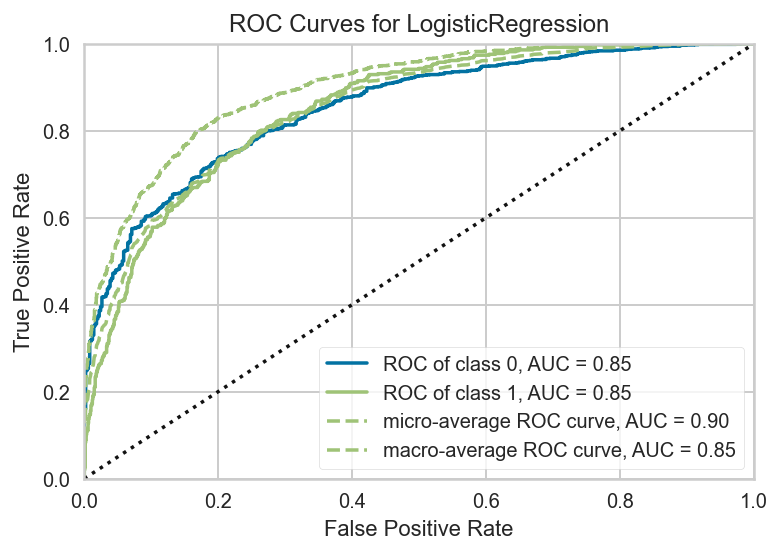

In [92]:
plot_model(base_model)

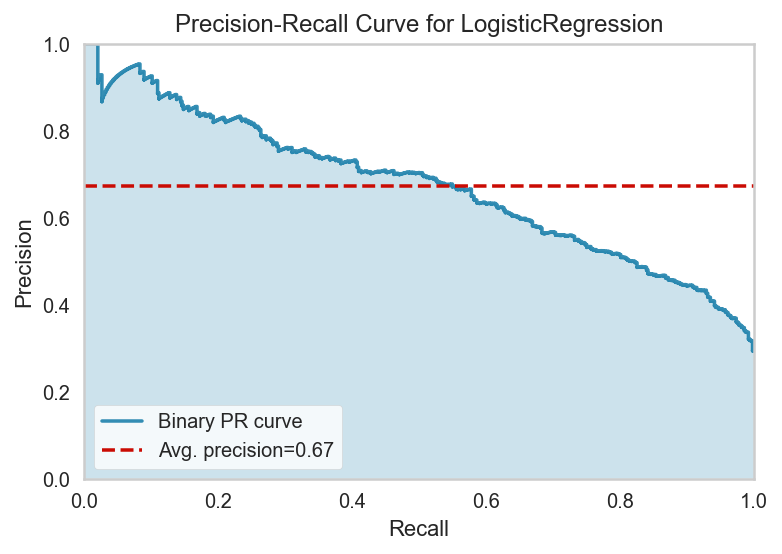

In [93]:
plot_model(base_model, plot="pr")

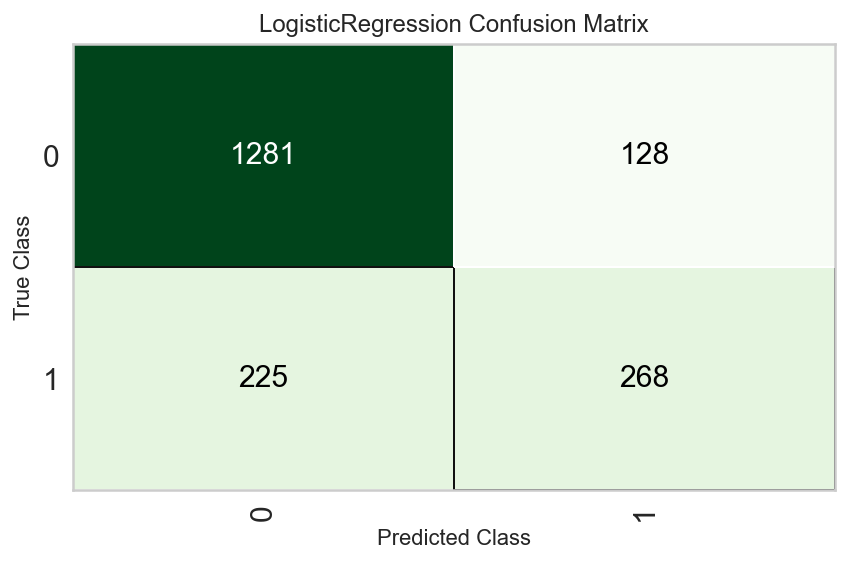

In [94]:
plot_model(base_model, plot="confusion_matrix")

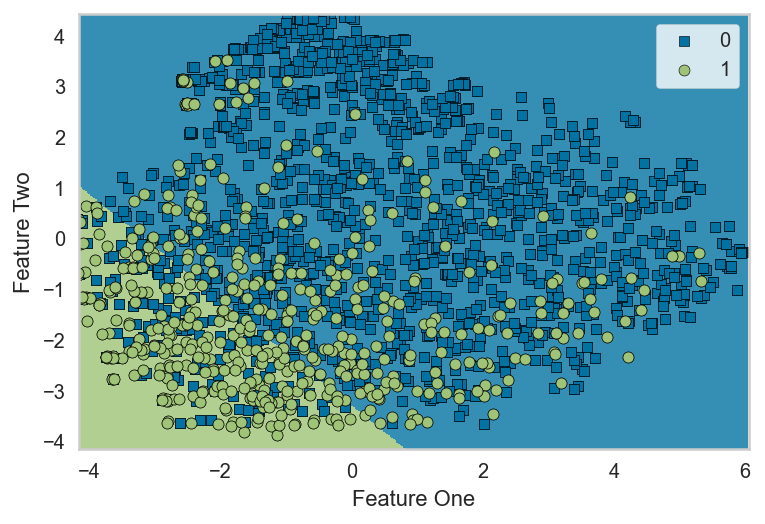

In [95]:
plot_model(base_model, plot="boundary")

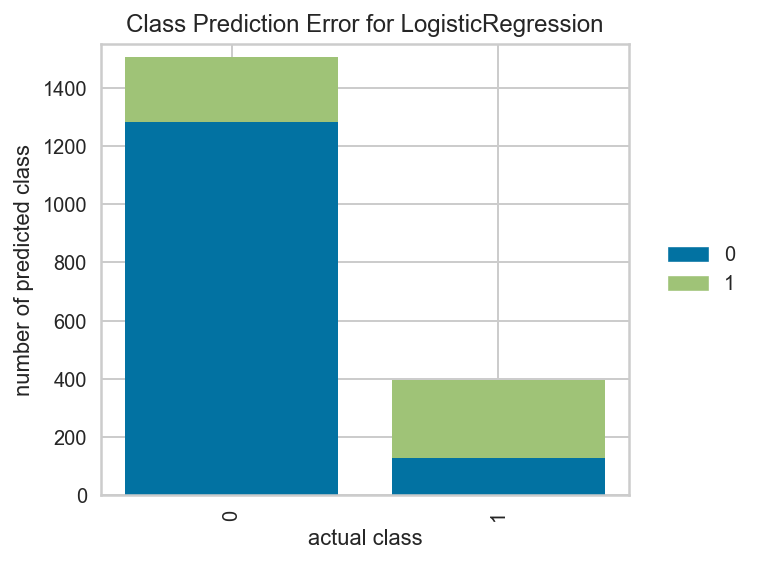

In [96]:
plot_model(base_model, plot = "error")

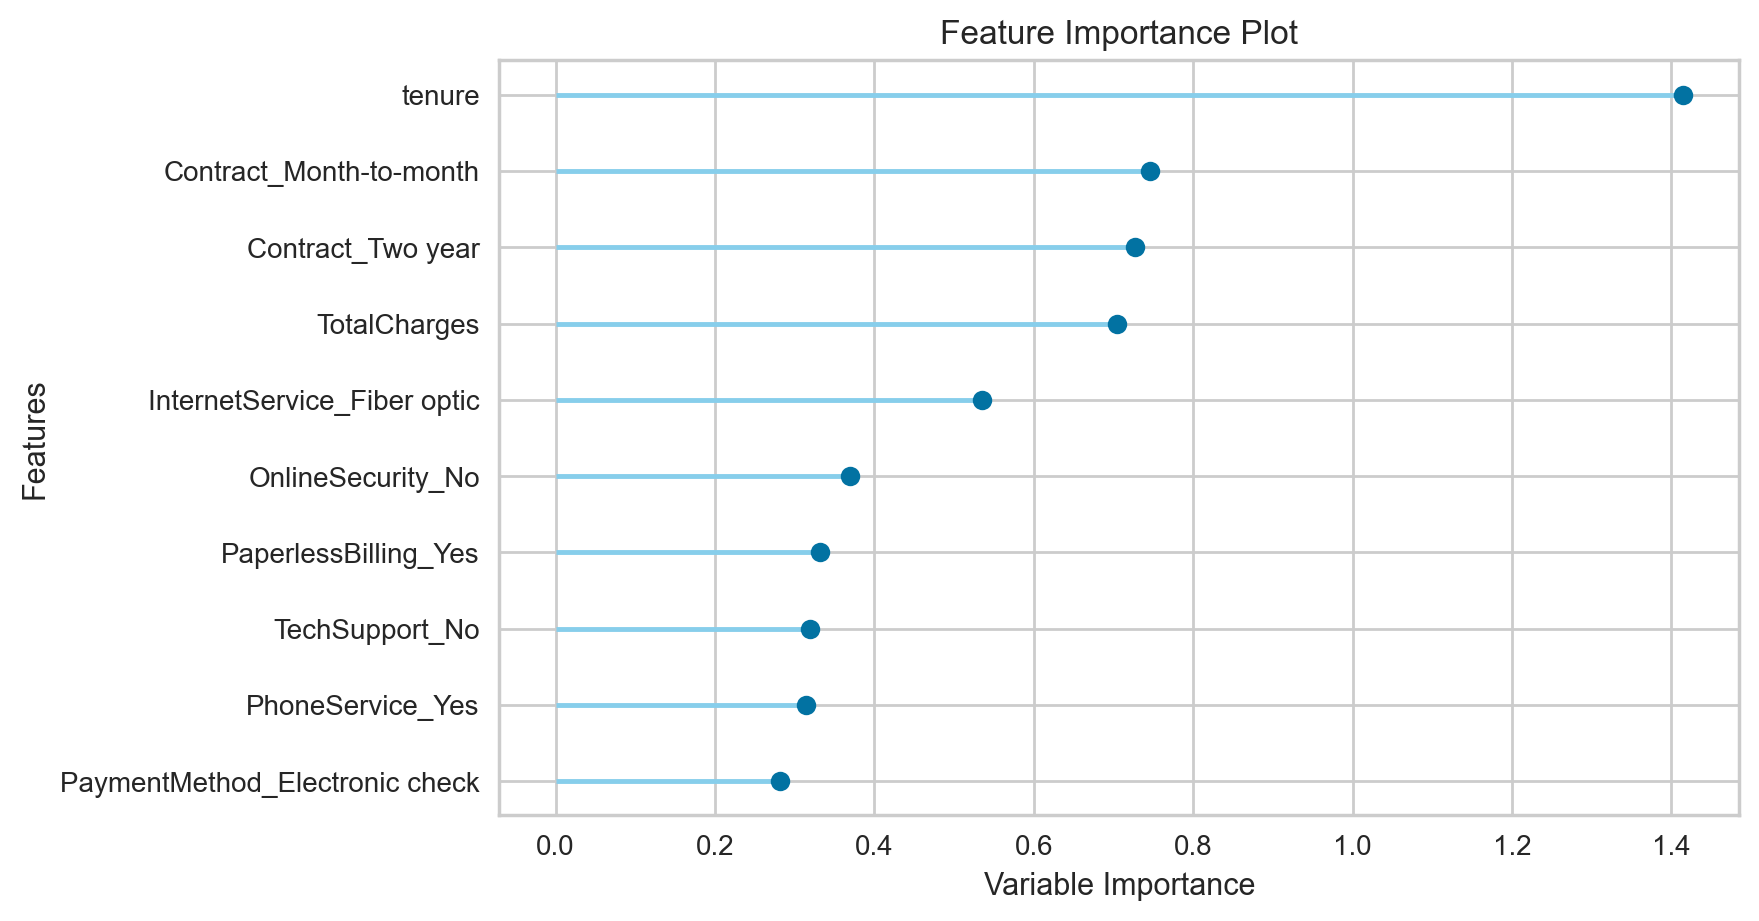

In [97]:
plot_model(base_model, plot = "feature")

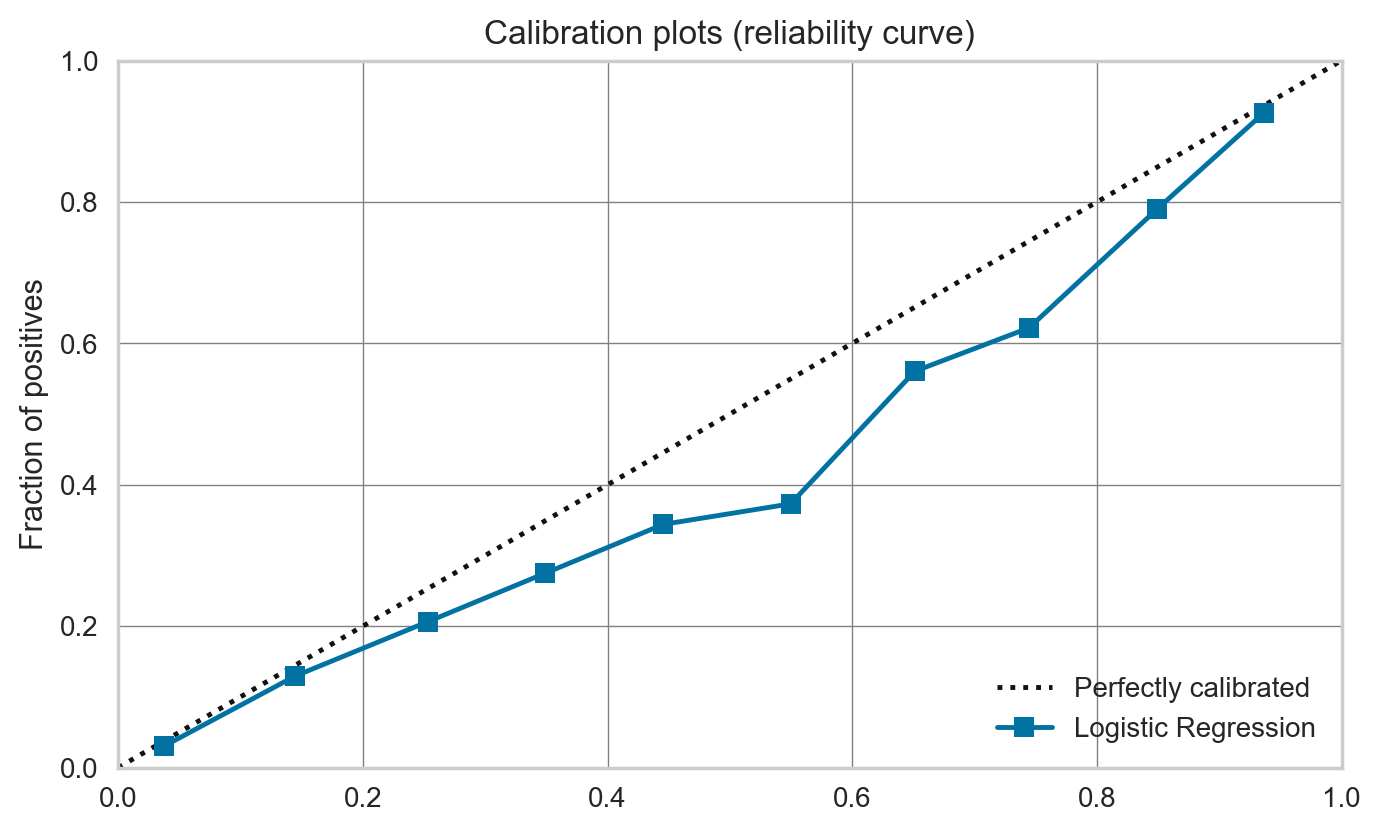

In [98]:
plot_model(base_model, plot = "calibration")

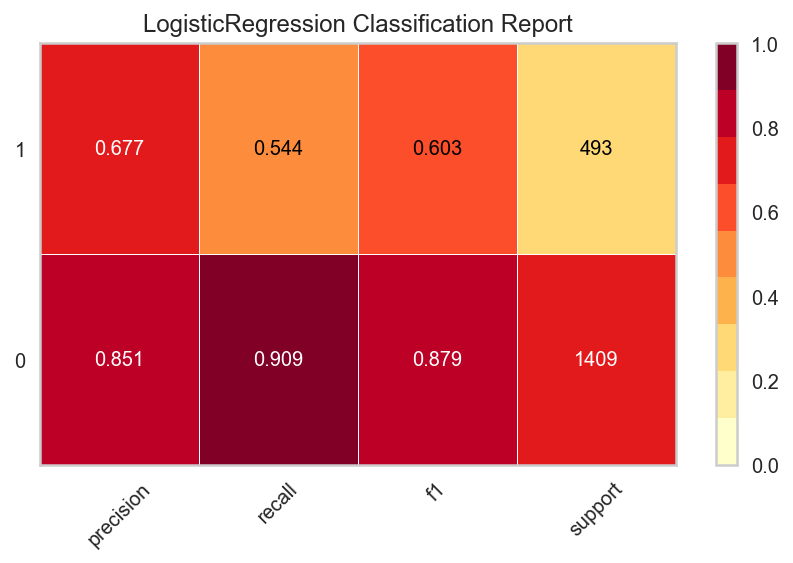

In [99]:
plot_model(base_model, plot="class_report")

In [100]:
tuned_model = tune_model(base_model, fold=10, optimize="F1")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7410,0.8219,0.7647,0.5112,0.6128,0.4295,0.4492
1,0.7432,0.8398,0.8487,0.5127,0.6392,0.4582,0.4933
2,0.7703,0.8737,0.8319,0.5470,0.6600,0.4975,0.5225
3,0.7140,0.8367,0.8403,0.4808,0.6116,0.4107,0.4509
4,0.7568,0.8671,0.8655,0.5282,0.6561,0.4844,0.5198
5,0.7477,0.8369,0.8000,0.5217,0.6316,0.4524,0.4764
6,0.7140,0.8072,0.7083,0.4802,0.5724,0.3692,0.3849
7,0.7314,0.8350,0.8319,0.5000,0.6246,0.4350,0.4693
8,0.7720,0.8596,0.8235,0.5506,0.6599,0.4984,0.5213
9,0.7314,0.8274,0.7647,0.5000,0.6047,0.4144,0.4359


In [101]:
plot_model(tuned_model, plot="parameter")

,Parameters
C,9.984
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


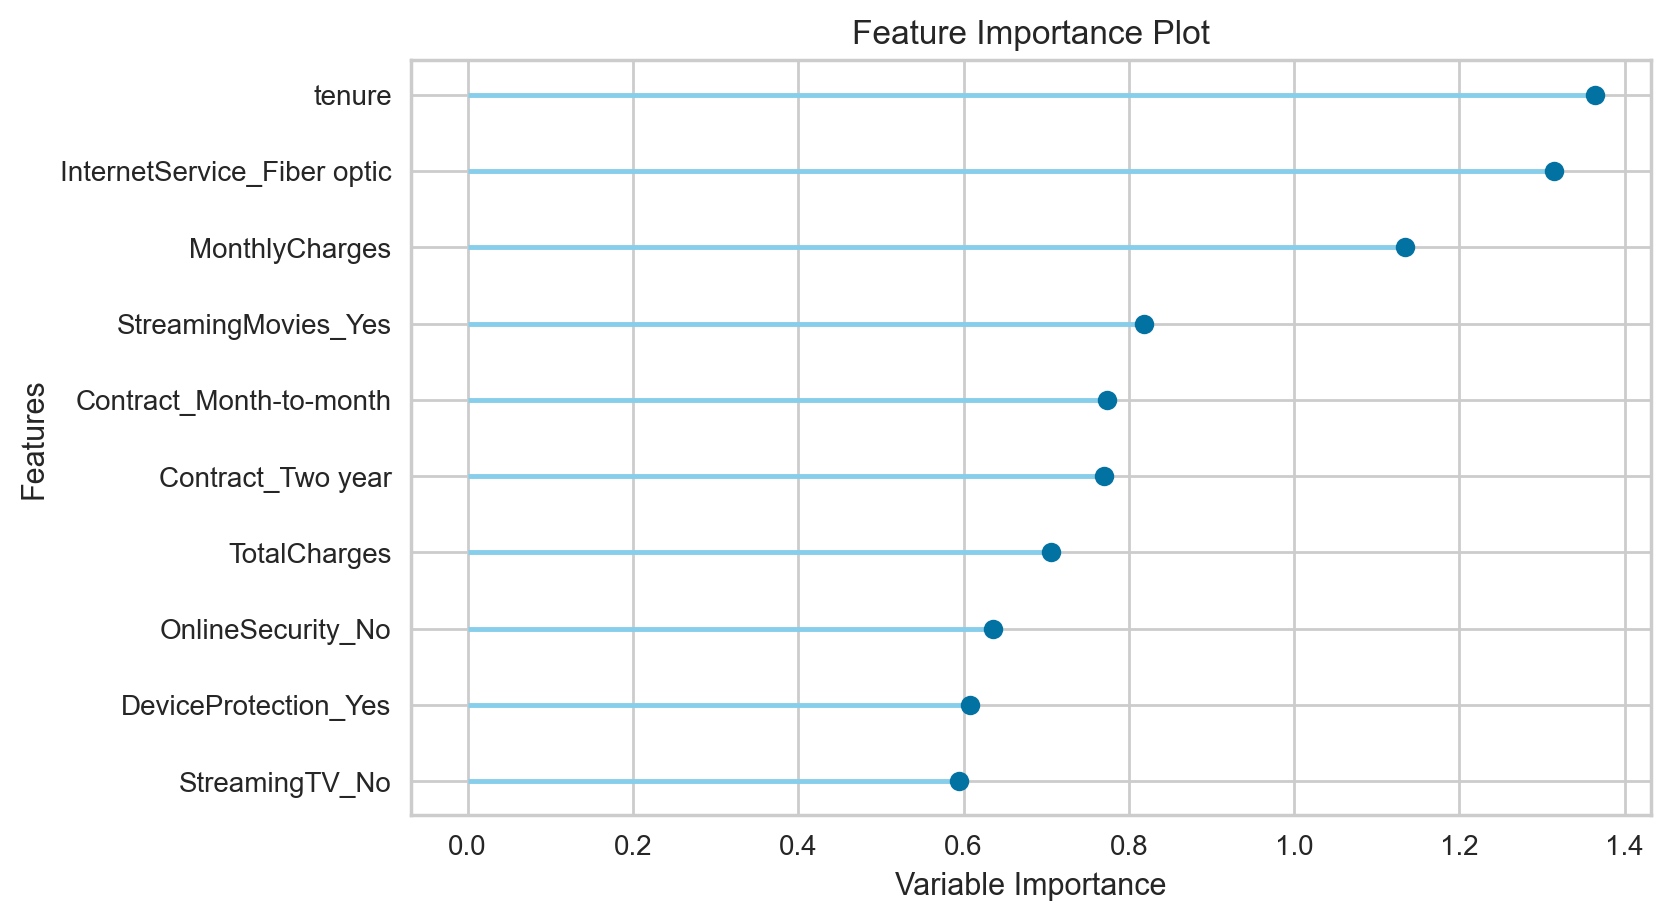

In [102]:
plot_model(tuned_model, plot="feature")

In [103]:
bagged_model = ensemble_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7342,0.8221,0.7395,0.5029,0.5986,0.4106,0.4276
1,0.7500,0.8402,0.8403,0.5208,0.6431,0.4666,0.4982
2,0.7725,0.8727,0.8403,0.5495,0.6645,0.5035,0.5296
3,0.7230,0.8365,0.8403,0.4902,0.6192,0.4243,0.4625
4,0.7613,0.8677,0.8655,0.5337,0.6603,0.4917,0.5259
5,0.7432,0.8351,0.7833,0.5165,0.6225,0.4401,0.4621
6,0.7162,0.8083,0.7167,0.4831,0.5772,0.3756,0.3921
7,0.7291,0.8344,0.8319,0.4975,0.6226,0.4315,0.4663
8,0.7720,0.8605,0.8151,0.5511,0.6576,0.4961,0.5175
9,0.7314,0.8254,0.7647,0.5000,0.6047,0.4144,0.4359


In [104]:
print(bagged_model)

BaggingClassifier(base_estimator=LogisticRegression(C=9.984,
                                                    class_weight='balanced',
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=1000,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=123,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
      

In [111]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7455,0.6718,0.5042,0.5263,0.5150,0.3426,0.3428
1,0.7252,0.6745,0.5546,0.4889,0.5197,0.3283,0.3296
2,0.7523,0.6776,0.5126,0.5398,0.5259,0.3583,0.3586
3,0.7387,0.6811,0.5462,0.5118,0.5285,0.3480,0.3484
4,0.7410,0.6617,0.4958,0.5175,0.5064,0.3310,0.3311
5,0.7342,0.6710,0.5250,0.5081,0.5164,0.3332,0.3333
6,0.6982,0.6322,0.4917,0.4470,0.4683,0.2582,0.2588
7,0.6930,0.6218,0.4706,0.4341,0.4516,0.2389,0.2393
8,0.7201,0.6783,0.5798,0.4825,0.5267,0.3304,0.3332
9,0.7314,0.6508,0.4790,0.5000,0.4893,0.3071,0.3073


In [112]:
boosted_dt = ensemble_model(dt,method= "Boosting")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7365,0.7045,0.3445,0.5125,0.4121,0.2506,0.2588
1,0.7342,0.7664,0.5126,0.5041,0.5083,0.3263,0.3263
2,0.7680,0.7791,0.5546,0.5690,0.5617,0.4040,0.4041
3,0.7455,0.7319,0.5042,0.5263,0.5150,0.3426,0.3428
4,0.7680,0.7658,0.4622,0.5851,0.5164,0.3666,0.3710
5,0.7545,0.7320,0.4333,0.5591,0.4883,0.3302,0.3348
6,0.7095,0.6812,0.4000,0.4571,0.4267,0.2333,0.2342
7,0.7291,0.7268,0.4538,0.4954,0.4737,0.2918,0.2923
8,0.7562,0.7490,0.5294,0.5478,0.5385,0.3729,0.3730
9,0.7359,0.6951,0.3697,0.5116,0.4293,0.2632,0.2691


In [114]:
boosted_lr = ensemble_model(bagged_model,method= "Boosting")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7342,0.8199,0.7395,0.5029,0.5986,0.4106,0.4276
1,0.7455,0.8388,0.8319,0.5156,0.6367,0.4569,0.4880
2,0.7725,0.8716,0.8235,0.5506,0.6599,0.4990,0.5218
3,0.7117,0.8344,0.8319,0.4783,0.6074,0.4048,0.4436
4,0.7568,0.8672,0.8571,0.5285,0.6538,0.4821,0.5157
5,0.7477,0.8366,0.7917,0.5220,0.6291,0.4500,0.4724
6,0.7162,0.8075,0.7167,0.4831,0.5772,0.3756,0.3921
7,0.7269,0.8307,0.8151,0.4949,0.6159,0.4230,0.4548
8,0.7652,0.8587,0.7983,0.5429,0.6463,0.4800,0.5000
9,0.7223,0.8247,0.7647,0.4892,0.5967,0.4002,0.4234


In [116]:
blended_model = blend_models(estimator_list=[bagged_model, boosted_lr,boosted_dt], method="soft")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7320,0.7885,0.4958,0.5000,0.4979,0.3151,0.3151
1,0.7455,0.8202,0.5966,0.5221,0.5569,0.3795,0.3811
2,0.7748,0.8562,0.5546,0.5841,0.5690,0.4167,0.4169
3,0.7590,0.8195,0.5882,0.5469,0.5668,0.4002,0.4007
4,0.7748,0.8402,0.5798,0.5798,0.5798,0.4260,0.4260
5,0.7590,0.8269,0.5333,0.5565,0.5447,0.3809,0.3811
6,0.7050,0.7754,0.5667,0.4626,0.5094,0.3015,0.3047
7,0.7381,0.7960,0.5378,0.5120,0.5246,0.3441,0.3443
8,0.7652,0.8330,0.5798,0.5610,0.5702,0.4088,0.4089
9,0.7494,0.8081,0.5294,0.5339,0.5316,0.3606,0.3606


## Model Calibration 
When performing classification you often not only want to predict the class label (outcome such as 0 or 1), but also obtain the probability of the respective outcome which provides a level of confidence on the prediction. Some models can give you poor estimates of the class probabilities and some do not even support probability prediction. Well calibrated classifiers are probabilistic and provide outputs in the form of probabilities that can be directly interpreted as a confidence level. PyCaret allows you to calibrate the probabilities of a given model through the calibrate_model() function. See an example below

In [117]:
top5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7978,0.8447,0.5328,0.6527,0.5858,0.4541,0.4587,0.2550
lr,Logistic Regression,0.7974,0.8408,0.5453,0.6457,0.5909,0.4576,0.4607,0.5540
ada,Ada Boost Classifier,0.7967,0.8422,0.5227,0.6532,0.5801,0.4482,0.4534,0.0860
lightgbm,Light Gradient Boosting Machine,0.7947,0.8344,0.5471,0.6391,0.5888,0.4532,0.4561,0.0640
ridge,Ridge Classifier,0.7933,0.0000,0.5093,0.6470,0.5693,0.4360,0.4418,0.0230
lda,Linear Discriminant Analysis,0.7926,0.8330,0.5529,0.6304,0.5887,0.4510,0.4529,0.0510
rf,Random Forest Classifier,0.7893,0.8235,0.5060,0.6361,0.5617,0.4259,0.4317,0.2060
svm,SVM - Linear Kernel,0.7780,0.0000,0.4345,0.6512,0.4989,0.3691,0.3920,0.0170
knn,K Neighbors Classifier,0.7670,0.7800,0.5336,0.5717,0.5512,0.3943,0.3952,0.0420
et,Extra Trees Classifier,0.7663,0.7874,0.4699,0.5808,0.5184,0.3667,0.3708,0.2120


In [118]:
stack_soft = stack_models(top5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7770,0.8266,0.4706,0.6087,0.5308,0.3877,0.3932
1,0.7748,0.8463,0.5210,0.5905,0.5536,0.4038,0.4052
2,0.8243,0.8800,0.5966,0.7030,0.6455,0.5297,0.5329
3,0.8041,0.8473,0.5294,0.6702,0.5915,0.4650,0.4706
4,0.8356,0.8715,0.6050,0.7347,0.6636,0.5561,0.5607
5,0.7905,0.8386,0.4667,0.6588,0.5463,0.4153,0.4257
6,0.7883,0.8160,0.5417,0.6250,0.5804,0.4398,0.4418
7,0.7946,0.8363,0.5126,0.6489,0.5728,0.4400,0.4453
8,0.8149,0.8656,0.5630,0.6907,0.6204,0.4997,0.5042
9,0.8081,0.8392,0.5210,0.6889,0.5933,0.4709,0.4788


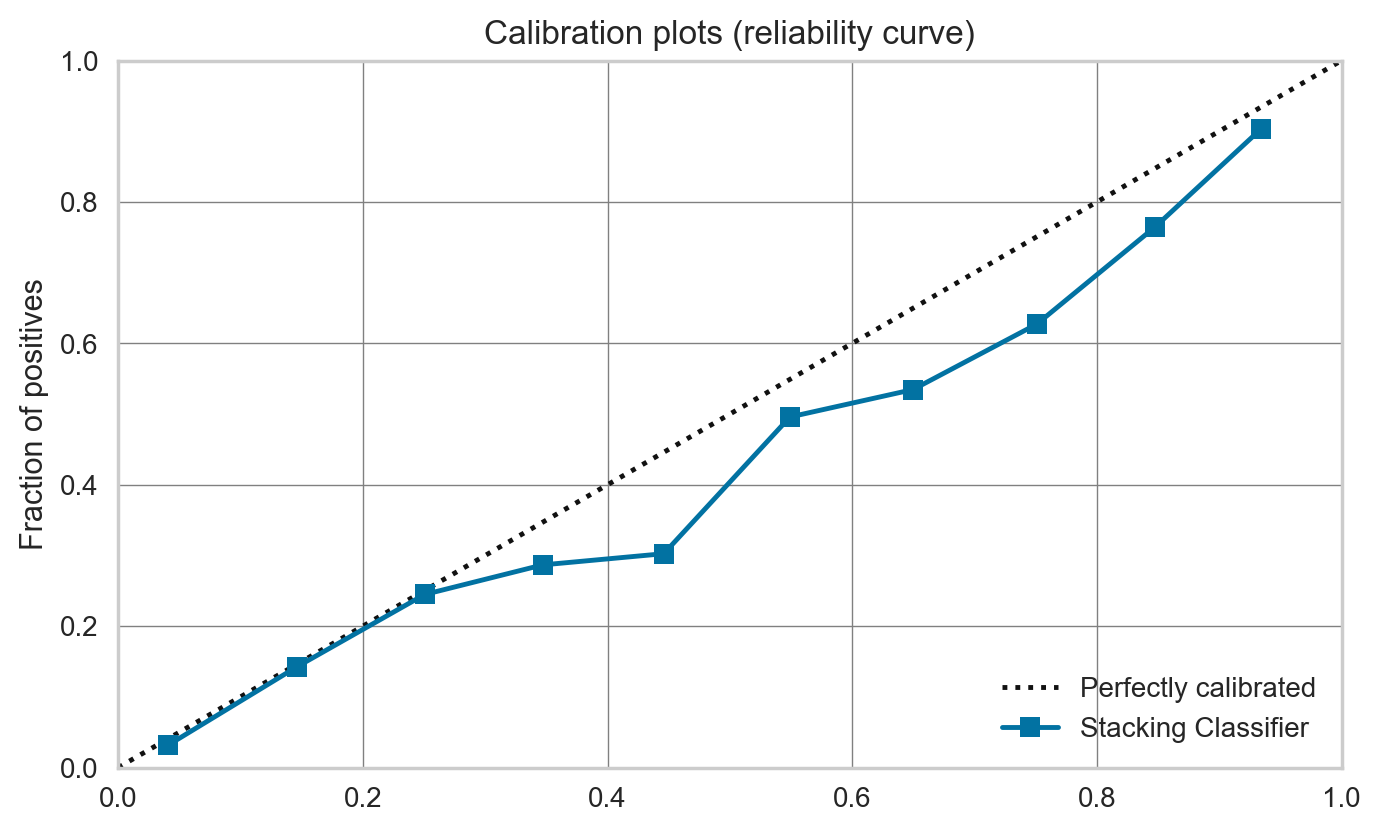

In [119]:
plot_model(stack_soft, plot='calibration')

In [120]:
calibrated_rf_isotonic = calibrate_model(stack_soft, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7703,0.8251,0.4370,0.5977,0.5049,0.3600,0.3674
1,0.7770,0.8428,0.5042,0.6000,0.5479,0.4014,0.4041
2,0.8311,0.8802,0.5798,0.7340,0.6479,0.5388,0.5453
3,0.8063,0.8464,0.5210,0.6813,0.5905,0.4666,0.4738
4,0.8243,0.8710,0.5882,0.7071,0.6422,0.5271,0.5310
5,0.7770,0.8399,0.4333,0.6265,0.5123,0.3740,0.3846
6,0.8041,0.8155,0.5417,0.6701,0.5991,0.4713,0.4760
7,0.8036,0.8387,0.5042,0.6818,0.5797,0.4553,0.4641
8,0.8194,0.8640,0.5546,0.7097,0.6226,0.5063,0.5129
9,0.8014,0.8355,0.4958,0.6782,0.5728,0.4474,0.4568


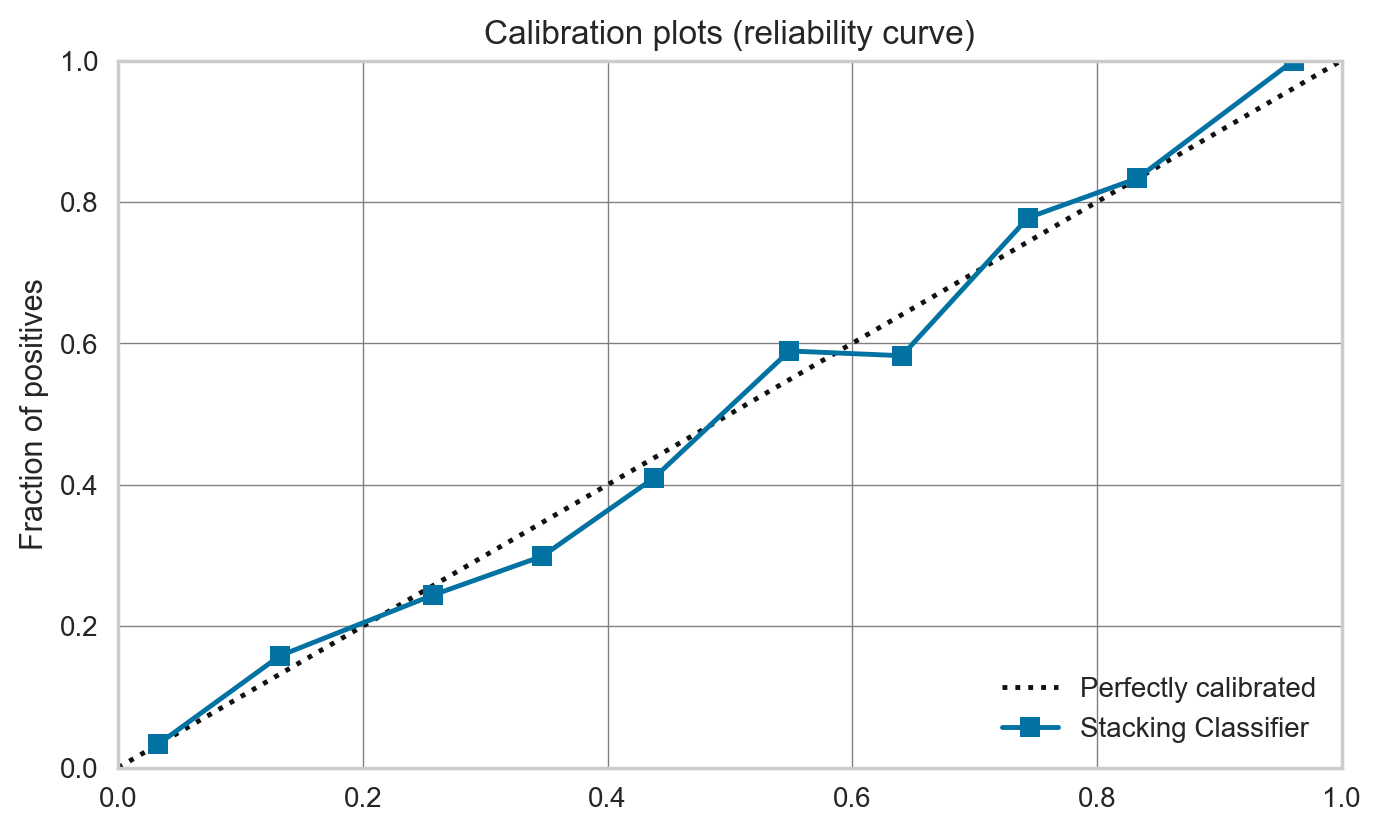

In [121]:
plot_model(calibrated_rf_isotonic, plot='calibration')

In [124]:
evaluate_model(calibrated_rf_isotonic)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [123]:
predict_model(calibrated_rf_isotonic)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.8113,0.8518,0.4848,0.6948,0.5711,0.4550,0.4671


,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),Contract_One year,Dependents_No,PaymentMethod_Bank transfer (automatic),MultipleLines_Yes,OnlineBackup_No,OnlineSecurity_No,MonthlyCharges,OnlineSecurity_Yes,...,DeviceProtection_Yes,PhoneService_Yes,InternetService_Fiber optic,TechSupport_No,StreamingMovies_Yes,gender_Male,InternetService_DSL,Churn,Label,Score
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.181769,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No,No,0.8920
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.533417,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Yes,No,0.8407
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.958887,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Yes,Yes,0.9330
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.610550,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,No,No,0.5614
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.053252,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Yes,Yes,0.5591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.971454,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,No,Yes,0.7531
1898,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.289378,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No,No,0.6403
1899,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.502877,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Yes,No,0.8641
1900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.469766,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,No,No,0.9971


In [128]:
nb = create_model('nb')
lr = create_model('lr')
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7703,0.8096,0.4706,0.5895,0.5234,0.3745,0.3787
1,0.7770,0.8315,0.5630,0.5877,0.5751,0.4241,0.4242
2,0.8446,0.8723,0.6303,0.7500,0.6849,0.5828,0.5867
3,0.7860,0.8305,0.5462,0.6132,0.5778,0.4351,0.4364
4,0.8311,0.8662,0.6471,0.7000,0.6725,0.5589,0.5597
5,0.7725,0.8281,0.4917,0.5960,0.5388,0.3897,0.3929
6,0.7815,0.7983,0.5500,0.6055,0.5764,0.4297,0.4306
7,0.7788,0.8247,0.5294,0.6000,0.5625,0.4152,0.4167
8,0.8172,0.8500,0.5882,0.6863,0.6335,0.5126,0.5153
9,0.7675,0.8186,0.5126,0.5755,0.5422,0.3871,0.3883


In [129]:
blend_soft = blend_models(estimator_list = [nb, lda, lr], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7703,0.8169,0.6807,0.5586,0.6136,0.4524,0.4569
1,0.7703,0.8282,0.7479,0.5528,0.6357,0.4734,0.4849
2,0.8063,0.8743,0.7731,0.6093,0.6815,0.5451,0.5531
3,0.7523,0.8318,0.7059,0.5283,0.6043,0.4294,0.4389
4,0.7973,0.8633,0.7899,0.5912,0.6763,0.5331,0.5450
5,0.7658,0.8369,0.7250,0.5506,0.6259,0.4600,0.4692
6,0.7432,0.8003,0.6667,0.5195,0.5839,0.4024,0.4089
7,0.7743,0.8290,0.7479,0.5597,0.6403,0.4807,0.4914
8,0.7946,0.8522,0.7395,0.5946,0.6592,0.5146,0.5209
9,0.7449,0.8238,0.6639,0.5197,0.5830,0.4032,0.4095


In [130]:
predict_model(calibrated_rf_isotonic)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.8113,0.8518,0.4848,0.6948,0.5711,0.4550,0.4671


,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),Contract_One year,Dependents_No,PaymentMethod_Bank transfer (automatic),MultipleLines_Yes,OnlineBackup_No,OnlineSecurity_No,MonthlyCharges,OnlineSecurity_Yes,...,DeviceProtection_Yes,PhoneService_Yes,InternetService_Fiber optic,TechSupport_No,StreamingMovies_Yes,gender_Male,InternetService_DSL,Churn,Label,Score
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.181769,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No,No,0.8920
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.533417,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Yes,No,0.8407
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.958887,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Yes,Yes,0.9330
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.610550,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,No,No,0.5614
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.053252,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Yes,Yes,0.5591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.971454,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,No,Yes,0.7531
1898,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.289378,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No,No,0.6403
1899,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.502877,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Yes,No,0.8641
1900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.469766,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,No,No,0.9971


In [131]:
predict_model(blend_soft)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7808,0.8479,0.7079,0.5611,0.6260,0.4739,0.4803


,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),Contract_One year,Dependents_No,PaymentMethod_Bank transfer (automatic),MultipleLines_Yes,OnlineBackup_No,OnlineSecurity_No,MonthlyCharges,OnlineSecurity_Yes,...,DeviceProtection_Yes,PhoneService_Yes,InternetService_Fiber optic,TechSupport_No,StreamingMovies_Yes,gender_Male,InternetService_DSL,Churn,Label,Score
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.181769,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No,No,0.9170
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.533417,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,Yes,No,0.5485
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.958887,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Yes,Yes,0.8760
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.610550,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,No,Yes,0.6687
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.053252,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,Yes,Yes,0.7196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,-0.971454,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,No,Yes,0.7425
1898,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-0.289378,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,No,Yes,0.6260
1899,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.502877,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Yes,No,0.8362
1900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.469766,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,No,No,0.9893


In [132]:
final_rf = finalize_model(blend_soft)

In [133]:
print(final_rf)

VotingClassifier(estimators=[('nb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('lda',
                              LinearDiscriminantAnalysis(n_components=None,
                                                         priors=None,
                                                         shrinkage=None,
                                                         solver='svd',
                                                         store_covariance=False,
                                                         tol=0.0001)),
                             ('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto'

In [135]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Label,Score
0,5129-JLPIS,Male,0,No,No,25.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No,Yes,0.5399
1,8191-XWSZG,Female,0,No,No,52.0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,No,0.9899
2,9959-WOFKT,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No,No,0.9634
3,6827-IEAUQ,Female,0,Yes,Yes,27.0,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,66.15,1874.45,No,No,0.9824
4,3413-BMNZE,Male,1,No,No,1.0,Yes,No,DSL,No,...,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No,Yes,0.5818


In [138]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Churn'], unseen_predictions['Label'], metric = 'AUC')

0.7852

In [139]:
model_paths = "/Users/sijeshp/MSc/SijDev/MLOps_ChurnPred/models/"
save_model(final_rf, model_paths+'Final_Blend_model_version0.1_20220129')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customerID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['SeniorCitizen'],
                                       target='Churn', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_nu...
                                                                           store_covariance=False,
                                                                           tol=0.0001)),
                                               ('lr',
                           

In [140]:
saved_model = load_model(model_paths+'Final_Blend_model_version0.1_20220129')

Transformation Pipeline and Model Successfully Loaded


In [141]:
new_prediction = predict_model(saved_model, data=data_unseen)

In [142]:
new_prediction.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Label,Score
0,5129-JLPIS,Male,0,No,No,25.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No,Yes,0.5399
1,8191-XWSZG,Female,0,No,No,52.0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No,No,0.9899
2,9959-WOFKT,Male,0,No,Yes,71.0,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No,No,0.9634
3,6827-IEAUQ,Female,0,Yes,Yes,27.0,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,66.15,1874.45,No,No,0.9824
4,3413-BMNZE,Male,1,No,No,1.0,Yes,No,DSL,No,...,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No,Yes,0.5818


In [143]:

from pycaret.utils import check_metric
check_metric(new_prediction['Churn'], new_prediction['Label'], metric = 'AUC')


0.7852

## API 

In [149]:
%%writefile customer_churn_service.py
#%pip install bentoml
import pandas as pd
import bentoml
from bentoml.frameworks.sklearn import SklearnModelArtifact
from bentoml.service.artifacts.common import PickleArtifact
from bentoml.handlers import DataframeHandler
from bentoml.adapters import DataframeInput

@bentoml.artifacts([PickleArtifact('model')])
@bentoml.env(pip_packages=["scikit-learn", "pandas"])
class ChurnPredictionModel(bentoml.BentoService):

    @bentoml.api(input=DataframeInput(), batch=True)
    def predict(self, df):
        """
        predict expects pandas.Series as input
        """        
#         series = df.iloc[0,:]
        return self.artifacts.model.predict(df)

Overwriting customer_churn_service.py


In [156]:
# 1) import the custom BentoService defined above
from customer_churn_service import ChurnPredictionModel

bento_service = ChurnPredictionModel()
model = load_model(model_paths+'Final_Blend_model_version0.1_20220129')
bento_service.pack('model',model)
bento_service_saved_path = bento_service.save()

Transformation Pipeline and Model Successfully Loaded
[2022-01-29 23:46:59,836] INFO - BentoService bundle 'ChurnPredictionModel:20220129234658_305F38' saved to: /Users/sijeshp/bentoml/repository/ChurnPredictionModel/20220129234658_305F38


In [157]:
!bentoml serve ChurnPredictionModel:latest

[2022-01-29 23:50:17,620] INFO - Getting latest version ChurnPredictionModel:20220129234658_305F38
[2022-01-29 23:50:17,640] INFO - Starting BentoML API proxy in development mode..
[2022-01-29 23:50:17,832] INFO - Micro batch enabled for API `predict` max-latency: 20000 max-batch-size 4000
[2022-01-29 23:50:17,832] INFO - Your system nofile limit is 12800, which means each instance of microbatch service is able to hold this number of connections at same time. You can increase the number of file descriptors for the server process, or launch more microbatch instances to accept more concurrent connection.
======== Running on http://0.0.0.0:5000 ========
(Press CTRL+C to quit)
[2022-01-29 23:50:18,161] INFO - Starting BentoML API server in development mode..
[2022-01-29 23:50:18,550] WARNING - bentoml.handlers.* will be deprecated after BentoML 1.0, use bentoml.adapters.* instead
[2022-01-29 23:50:18,904] WARNING - Python 3.9.6 found in current environment is not officially supported by Be

In [162]:
!bentoml containerize ChurnPredictionModel:latest  

[2022-01-30 00:19:01,127] INFO - Getting latest version ChurnPredictionModel:20220129234658_305F38
Found Bento: /Users/sijeshp/bentoml/repository/ChurnPredictionModel/20220129234658_305F38
Containerizing ChurnPredictionModel:20220129234658_305F38 with local YataiService and docker daemon from local environment-
Build container image: churnpredictionmodel:20220129234658_305F38


In [163]:
!docker run --rm -p 5000:5000 churnpredictionmodel:20220129234658_305F38

[2022-01-29 20:19:08,144] INFO - Starting BentoML proxy in production mode..
[2022-01-29 20:19:08,146] INFO - Starting BentoML API server in production mode..
[2022-01-29 20:19:08,317] INFO - Running micro batch service on :5000
[2022-01-29 20:19:08 +0000] [10] [INFO] Starting gunicorn 20.1.0
[2022-01-29 20:19:08 +0000] [10] [INFO] Listening at: http://0.0.0.0:48701 (10)
[2022-01-29 20:19:08 +0000] [10] [INFO] Using worker: sync
[2022-01-29 20:19:08 +0000] [11] [INFO] Booting worker with pid: 11
[2022-01-29 20:19:08,371] WARNING - Saved BentoService Python version mismatch: loading BentoService bundle created with Python version 3.9.6, but current environment version is 3.9.7.
[2022-01-29 20:19:08 +0000] [1] [INFO] Starting gunicorn 20.1.0
[2022-01-29 20:19:08 +0000] [1] [INFO] Listening at: http://0.0.0.0:5000 (1)
[2022-01-29 20:19:08 +0000] [1] [INFO] Using worker: aiohttp.worker.GunicornWebWorker
[2022-01-29 20:19:08 +0000] [12] [INFO] Booting worker with pid: 12
[2022-01-29 20:19:0